Got into sale company as data analysis 
they want to know should they invest and focus on develop app or website?

Import library for notebook

In [17]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline


Read csv file and describe

In [18]:
customers = pd.read_csv('./data/Ecommerce Customers.csv')
customers.describe()


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [19]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


According to the data set describe and infor table 
- the data set has no null value 


Find the relationship between columns

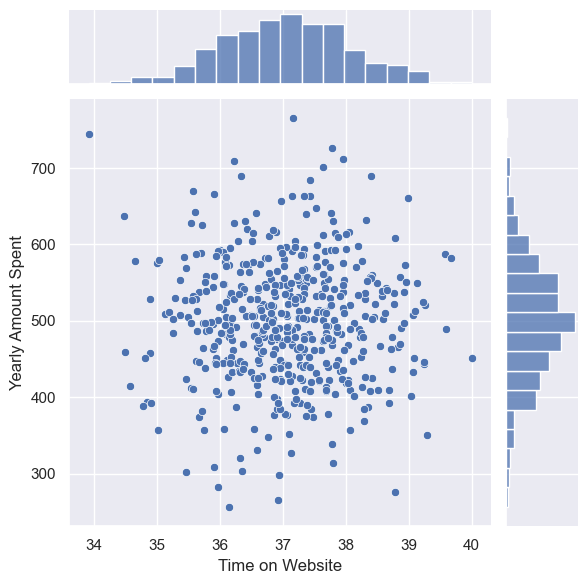

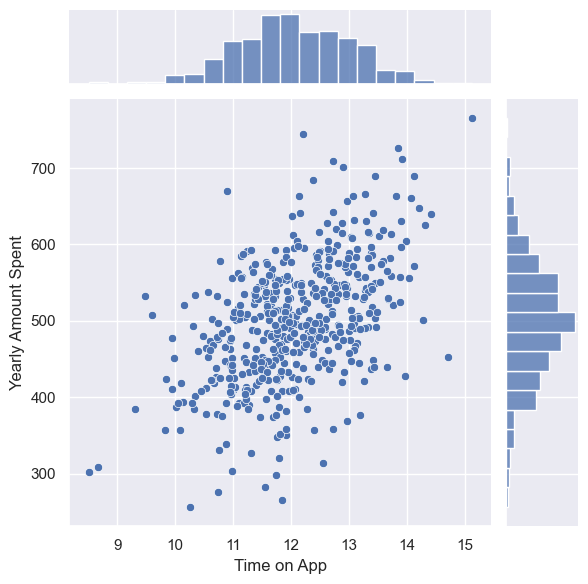

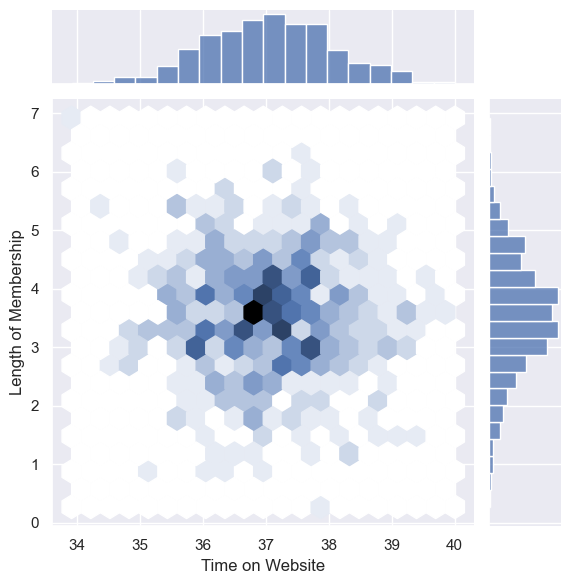

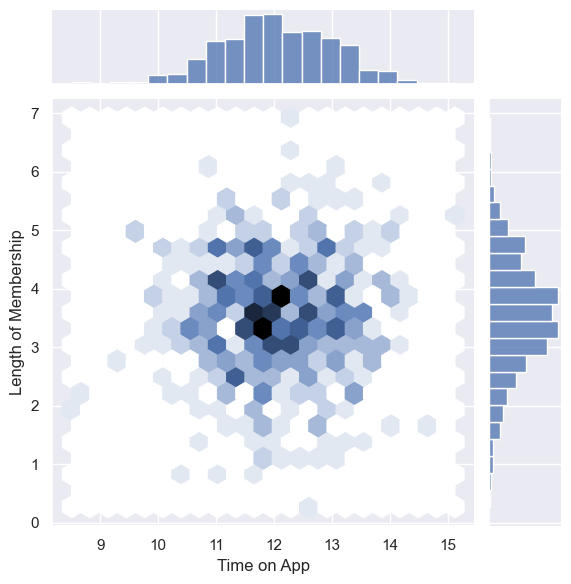

In [20]:
sns.jointplot(x='Time on Website',y ='Yearly Amount Spent', data = customers)
sns.jointplot(x='Time on App',y ='Yearly Amount Spent', data = customers)
sns.jointplot(x='Time on Website',y ='Length of Membership', data = customers, kind='hex')
sns.jointplot(x='Time on App',y ='Length of Membership', data = customers, kind='hex')

According to graphs we see significant increasing trend between Time on app and Yearly amount spent while we can not see clear pattern from other. Let see bigger big picture of all relationship so that we can have a vision of which segment has high impact on Yearly amount spend

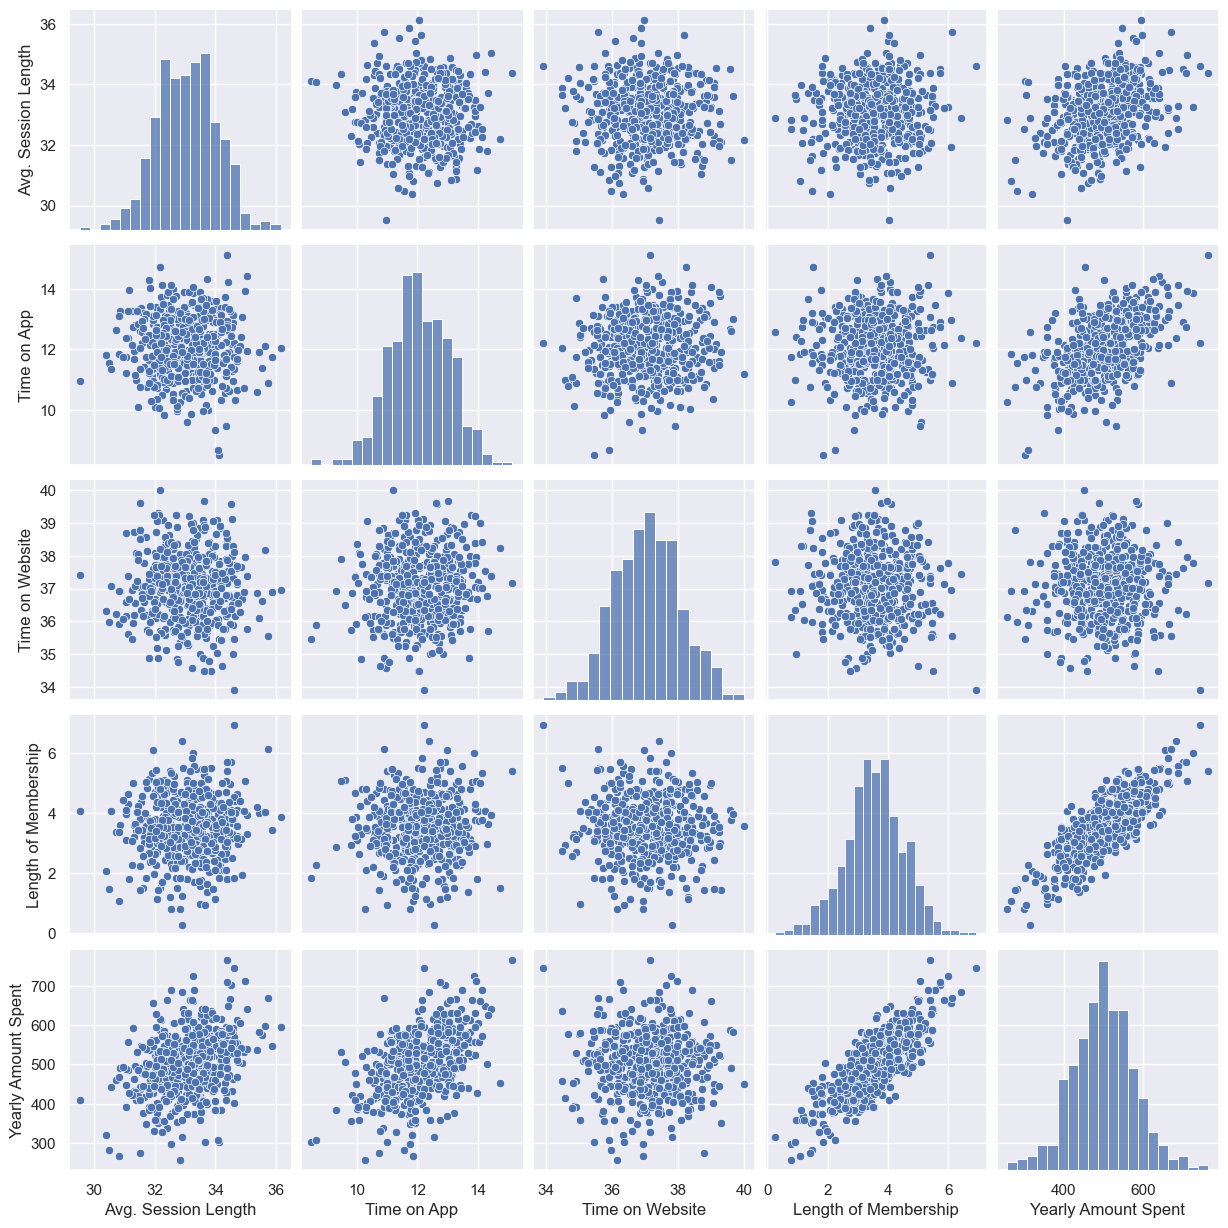

In [21]:
sns.pairplot(customers)

From here we can see a clear picture that the more time users spend on the app and the length of membership the more money they spend, from here we can go to the temporary conclusion that the company should focus and invest in the app instead of the website. For deeper analysis, let feed data into a linear regression model and find out if the assumption is right or wrong.

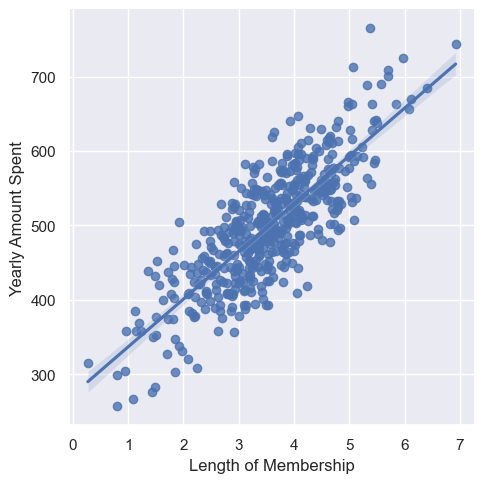

In [22]:
sns.set(color_codes=True)
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent',data=customers)

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


Let see the relationship bettween Time On App and Yearly Amount Spend, we split columns of these two into x and y and the split in to X_train, X_test, y_train, y_test with size 30% data for testing and 70% for training model\

In [24]:
X = customers[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]
print(X.head())
y= customers['Yearly Amount Spent']
print(y.head())

   Avg. Session Length  Time on App  Time on Website  Length of Membership
0            34.497268    12.655651        39.577668              4.082621
1            31.926272    11.109461        37.268959              2.664034
2            33.000915    11.330278        37.110597              4.104543
3            34.305557    13.717514        36.721283              3.120179
4            33.330673    12.795189        37.536653              4.446308
0    587.951054
1    392.204933
2    487.547505
3    581.852344
4    599.406092
Name: Yearly Amount Spent, dtype: float64


Training the Model

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#Create an instance of a LinearRegression() model named lm.
lm = LinearRegression()
#Train fit data on the training data
lm.fit(X_train, y_train )
#Print out the coefficients of the model
print(lm.coef_)

[25.98154972 38.59015875  0.19040528 61.27909654]


Predicting Test Data

C:\Users\Public\anaconda3\envs\ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Density'>

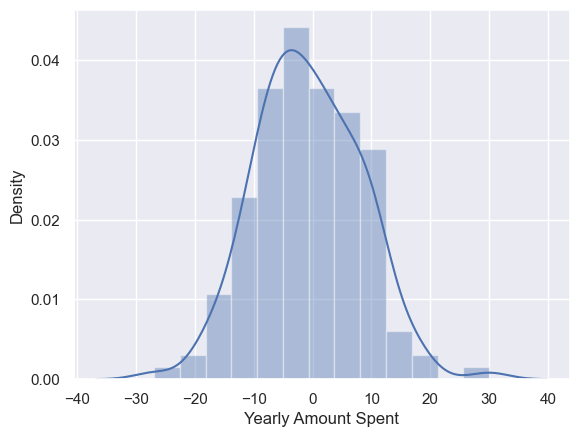

In [26]:
#Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().
sns.distplot((y_test-predictions))

In [30]:
#Use lm.predict() to predict off the X_test set of the data.
predictions = lm.predict(X_test)

Evaluate model

Text(0.5, 0, 'Y test')

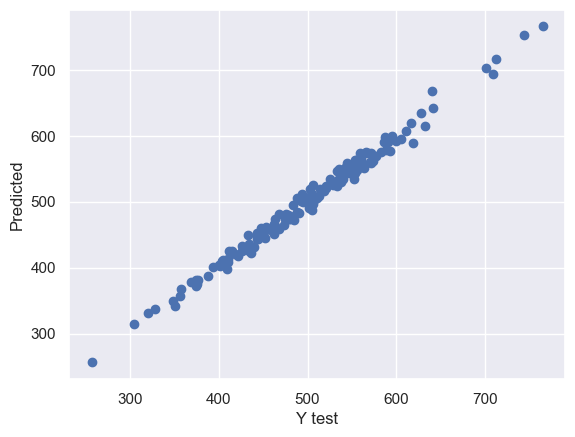

In [29]:
#Create a scatterplot of the real test values versus the predicted values.
plt.pyplot.scatter(y_test, predictions)
plt.pyplot.ylabel('Predicted')
plt.pyplot.xlabel('Y test')

the result look good when the prediction and the Y_test have nearly same value, let check error bettween Y_prediction and actual value.

In [28]:
import sklearn.metrics as metrics
from sklearn.metrics import r2_score
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, predictions)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, predictions)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, predictions))))
print('R2: {}'.format(r2_score(y_test, predictions)))

MAE: 7.228148653430832
MSE: 79.81305165097456
RMSE: 8.93381506697864
R2: 0.9890046246741234


MAE,MSE,RMSE are the value that mesure average error so the lower the better
R2 is checking how many actual values on prediction line so the higher the better and we have result 0.98/1 
According to these result, The model is working well and useable

Conclusion for question "what should they invest and focus on develop app or website?"
Company should invest and focus on develop app